1. Indicate the imported packages/libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score


2. Load the dataset and print the data information


In [15]:
# Load the dataset into a data frame

df = pd.read_csv('dataset_sl.csv')

# Print dataset information

print(df.info()) # checking if there is any null in the dataset

print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB
None
     feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           5         1         1         1         2         1         3   
1           5         4         4         5         7        10         3   
2           3         1         1         1         2         2         3   
3           6         8         8         1         3         4         3   
4           4        

3. Print out the number of samples for each class in the dataset

In [16]:
# Counting the number of samples for each class
count_class = df['class'].value_counts()

# Printing the number of samples for each class
print('Number of samples for each class:')
print(count_class)


Number of samples for each class:
class
0    459
1    241
Name: count, dtype: int64


Plot some figures to visualize the dataset (e.g., histogram, etc.)

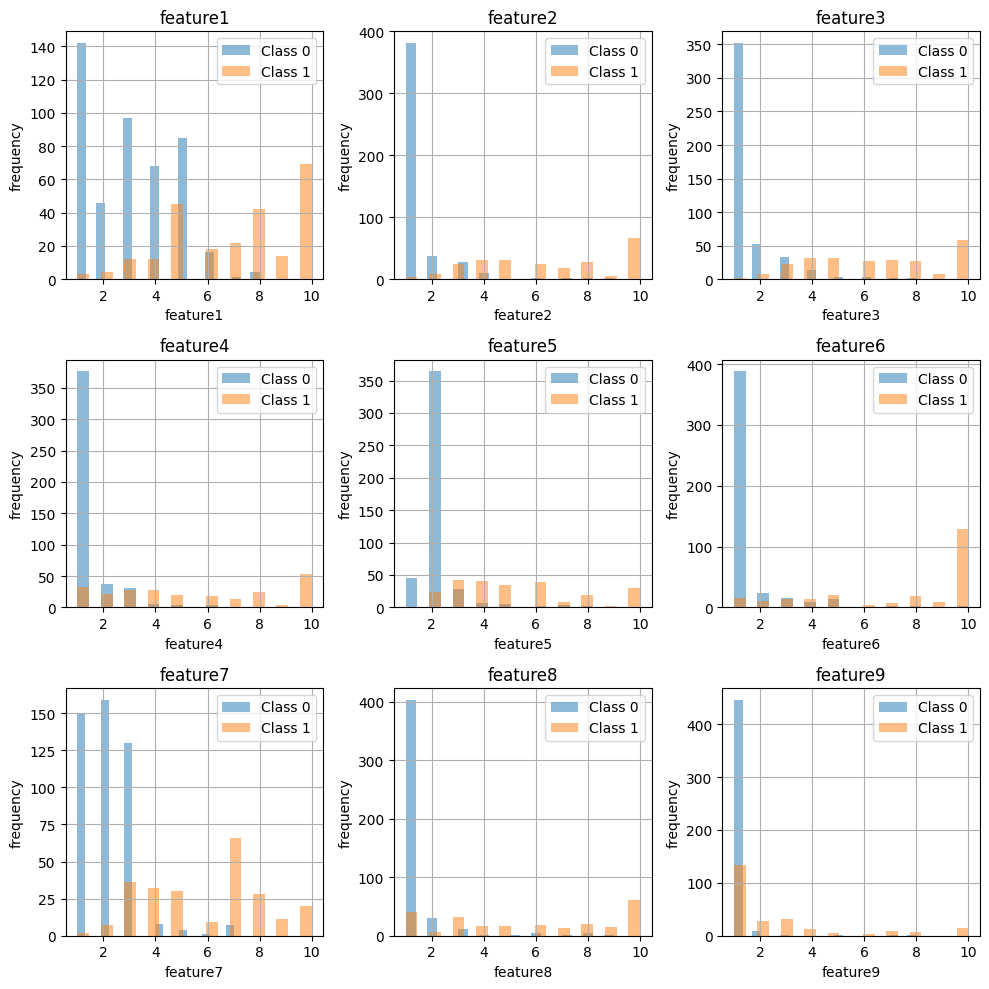

In [17]:
# Histogram

# First create a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Iterate over each feature
for i, ax in enumerate(axs.flat, start=1):
    feature_name = f'feature{i}'
    for cls in df['class'].unique():
        df[df['class'] == cls][feature_name].hist(bins=20, alpha=0.5, ax=ax, label=f'Class {cls}')
    ax.set(title=f'{feature_name}', xlabel=feature_name, ylabel='frequency')
    ax.legend()

plt.tight_layout()

# Plot the histogram
plt.show()


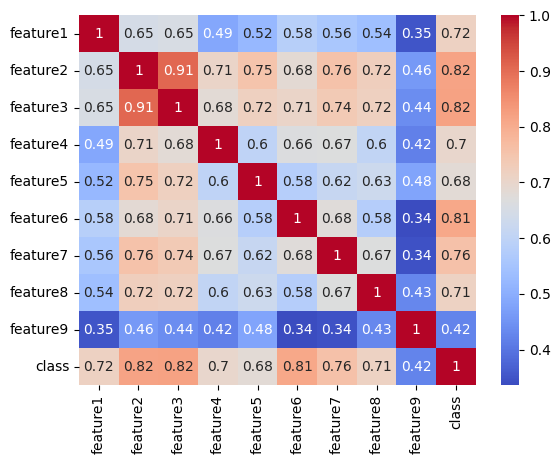

In [18]:
# Correlation matrix

# Calculate
corr = df.corr()

# Use seaborn to create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Plot the correlation matrix
plt.show()

For each class, print out the statistical description of features (e.g., the input variable x), such as mean, std, max and min values, etc.

In [19]:
# Statistical description of features

# Group the data by class
grouped_by_class = df.groupby('class')

# Iterate over the feature columns
for i in range(1, 10):
    feature_name = f'feature{i}'
    print(f'Statistical description of {feature_name} by class:')
    print(grouped_by_class[feature_name].describe())


Statistical description of feature1 by class:
       count      mean       std  min  25%  50%   75%   max
class                                                      
0      459.0  2.956427  1.672490  1.0  1.0  3.0   4.0   8.0
1      241.0  7.195021  2.428849  1.0  5.0  8.0  10.0  10.0
Statistical description of feature2 by class:
       count      mean       std  min  25%  50%   75%   max
class                                                      
0      459.0  1.324619  0.906830  1.0  1.0  1.0   1.0   9.0
1      241.0  6.572614  2.719512  1.0  4.0  6.0  10.0  10.0
Statistical description of feature3 by class:
       count      mean       std  min  25%  50%  75%   max
class                                                     
0      459.0  1.442266  0.996960  1.0  1.0  1.0  1.0   8.0
1      241.0  6.560166  2.562045  1.0  4.0  6.0  9.0  10.0
Statistical description of feature4 by class:
       count      mean       std  min  25%  50%  75%   max
class                                    

4. Split data into a training dataset and a testing dataset (i.e., 80% v.s. 20%)

In [20]:
# Splitting the data into X features and y class labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Splitting the data into training data and testing data, with 80:20 respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. For each classification algorithm:

Optimize each classification algorithm using K-Fold Cross Validation on the training dataset to fine-tune hyperparameters. Evaluate their performance on the validation dataset based on precision, recall, accuracy, and F1-Score to select the most effective model.

Test the best-performing model on the testing dataset, visualizing its performance with a confusion matrix and summarizing precision, recall, accuracy, and F1-Score using tables or graphs.

Best k value based on accuracy: 9
Best k value based on recall: 7
Best k value based on precision: 27
Best k value based on F1-score: 9


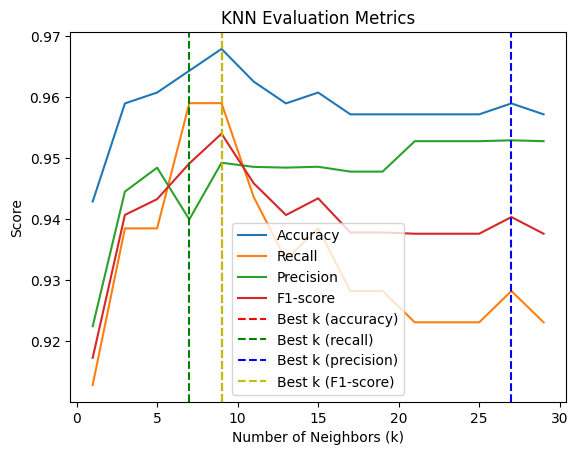

KNeighborsClassifier(n_neighbors=9)

In [21]:
# KNN Classification Algorithm

# Range of k values
k_values = list(range(1, 31,2))

# Initialize lists to store the cross-val scores
cv_scores_acc = []
cv_scores_recall = []
cv_scores_precision = []
cv_scores_f1 = []

# Perform K-Fold Cross Validation on range of k on each evaluation metric with k=5
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Accuracy 
    scores_acc = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_acc.append(scores_acc.mean())

    # Recall 
    scores_recall = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    cv_scores_recall.append(scores_recall.mean())

    # Precision 
    scores_precision = cross_val_score(knn, X_train, y_train, cv=5, scoring='precision')
    cv_scores_precision.append(scores_precision.mean())

    # F1 
    scores_f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
    cv_scores_f1.append(scores_f1.mean())
    
# Calculate best k value based on each evaluation metric
best_k_acc = k_values[cv_scores_acc.index(max(cv_scores_acc))]
best_k_recall = k_values[cv_scores_recall.index(max(cv_scores_recall))]
best_k_precision = k_values[cv_scores_precision.index(max(cv_scores_precision))]
best_k_f1 = k_values[cv_scores_f1.index(max(cv_scores_f1))]

# Print the best k values based on each evaluation metric
print("Best k value based on accuracy:", best_k_acc)
print("Best k value based on recall:", best_k_recall)
print("Best k value based on precision:", best_k_precision)
print("Best k value based on F1-score:", best_k_f1)

# Plot the cross-validation results for range of k values
plt.plot(k_values, cv_scores_acc, label='Accuracy')
plt.plot(k_values, cv_scores_recall, label='Recall')
plt.plot(k_values, cv_scores_precision, label='Precision')
plt.plot(k_values, cv_scores_f1, label='F1-score')

# Plot the best k values against each evaluation metric
plt.axvline(x=best_k_acc, linestyle='--', color='r', label='Best k (accuracy)')
plt.axvline(x=best_k_recall, linestyle='--', color='g', label='Best k (recall)')
plt.axvline(x=best_k_precision, linestyle='--', color='b', label='Best k (precision)')
plt.axvline(x=best_k_f1, linestyle='--', color='y', label='Best k (F1-score)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Evaluation Metrics')
plt.legend()

# Plot 
plt.show()

# Train the KNN model with the most optimal k value found using the training set
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)


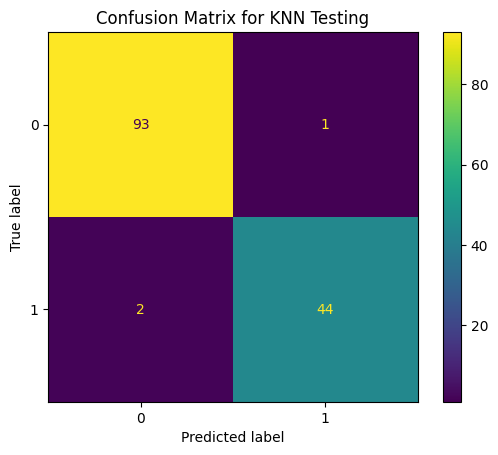

Precision based on a best k = 9: 0.9777777777777777
Recall based on a best k = 9: 0.9565217391304348
Accuracy based on a best k = 9: 0.9785714285714285
F1-Score Precision based on a best k = 9: 0.967032967032967


In [22]:
# KNN testing

# Make predictions on the testing set
y_pred_knn = knn.predict(X_test)

# Use the testing data to calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion Matrix for KNN Testing')
plt.show()

# Evaluation metrics

# Calculate evaluation metrics using the best k value on testing data
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print evaluation metrics using the best k value on testing data
print("Precision based on a best k = 9:", precision_knn)
print("Recall based on a best k = 9:", recall_knn)
print("Accuracy based on a best k = 9:", accuracy_knn)
print("F1-Score Precision based on a best k = 9:", f1_knn)


Best C value based on accuracy: 0.1
Best C value based on recall: 0.1
Best C value based on precision: 0.001
Best C value based on F1-score: 0.1


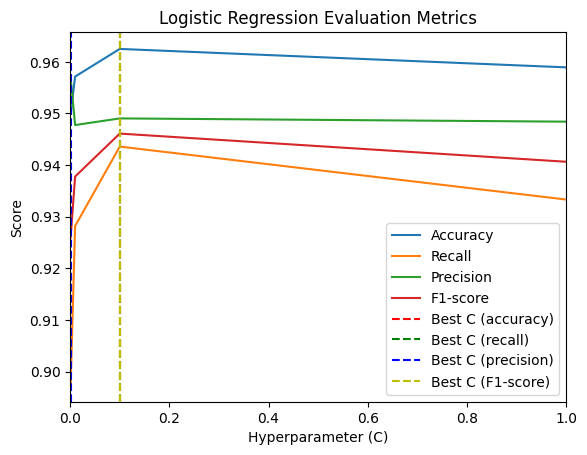

LogisticRegression(C=0.1)

In [23]:
# Logistic Regression Classification Algorithm

# Range of C values
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store the cross-val scores
cv_scores_acc = []
cv_scores_recall = []
cv_scores_precision = []
cv_scores_f1 = []

# Perform K-Fold Cross Validation on range of C on each evaluation metric with k=5
for c in c_values:
    lr = LogisticRegression(C=c)

    # Accuracy 
    scores_acc = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_acc.append(scores_acc.mean())

    # Recall 
    scores_recall = cross_val_score(lr, X_train, y_train, cv=5, scoring='recall')
    cv_scores_recall.append(scores_recall.mean())

    # Precision 
    scores_precision = cross_val_score(lr, X_train, y_train, cv=5, scoring='precision')
    cv_scores_precision.append(scores_precision.mean())

    # F1 
    scores_f1 = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1')
    cv_scores_f1.append(scores_f1.mean())

# Calculate the best C value based on each evaluation metric
best_c_acc = c_values[cv_scores_acc.index(max(cv_scores_acc))]
best_c_recall = c_values[cv_scores_recall.index(max(cv_scores_recall))]
best_c_precision = c_values[cv_scores_precision.index(max(cv_scores_precision))]
best_c_f1 = c_values[cv_scores_f1.index(max(cv_scores_f1))]

# Print the best C values based on each evaluation metric
print("Best C value based on accuracy:", best_c_acc)
print("Best C value based on recall:", best_c_recall)
print("Best C value based on precision:", best_c_precision)
print("Best C value based on F1-score:", best_c_f1)

# Plot the cross-validation results for range of C
plt.plot(c_values, cv_scores_acc, label='Accuracy')
plt.plot(c_values, cv_scores_recall, label='Recall')
plt.plot(c_values, cv_scores_precision, label='Precision')
plt.plot(c_values, cv_scores_f1, label='F1-score')

# Plot the best C values against each evaluation metric
plt.axvline(x=best_c_acc, linestyle='--', color='r', label='Best C (accuracy)')
plt.axvline(x=best_c_recall, linestyle='--', color='g', label='Best C (recall)')
plt.axvline(x=best_c_precision, linestyle='--', color='b', label='Best C (precision)')
plt.axvline(x=best_c_f1, linestyle='--', color='y', label='Best C (F1-score)')
plt.xlabel('Hyperparameter (C)')
plt.ylabel('Score')
plt.title('Logistic Regression Evaluation Metrics')
plt.legend()

plt.xlim(0, 1)

# Plot
plt.show()

# Train the logistic regression model with the best C value using the training set
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)



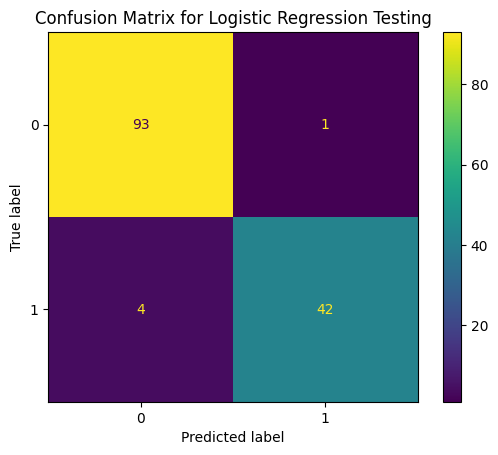

Precision based on a best C = 0.1:  0.9767441860465116
Recall based on a best C = 0.1:  0.9130434782608695
F1-Score based on a best C = 0.1:  0.9438202247191011
Accuracy based on a best C = 0.1:  0.9642857142857143


In [24]:
# Logisitic Regression Testing

# Make predictions on the testing set
y_pred_lr = lr.predict(X_test)

# Use the testing data to calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Logistic Regression Testing')
plt.show()

# Evaluation metrics

# Calculate evaluation metrics using the best C value on testing data
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print evaluation metrics using the best C value on testing data
print("Precision based on a best C = 0.1: ", precision_lr)
print("Recall based on a best C = 0.1: ", recall_lr)
print("F1-Score based on a best C = 0.1: ", f1_lr)
print("Accuracy based on a best C = 0.1: ", accuracy_lr)

Best max depth value based on accuracy: 5
Best max depth value based on recall: 3
Best max depth value based on precision: 5
Best max depth value based on F1-score: 3


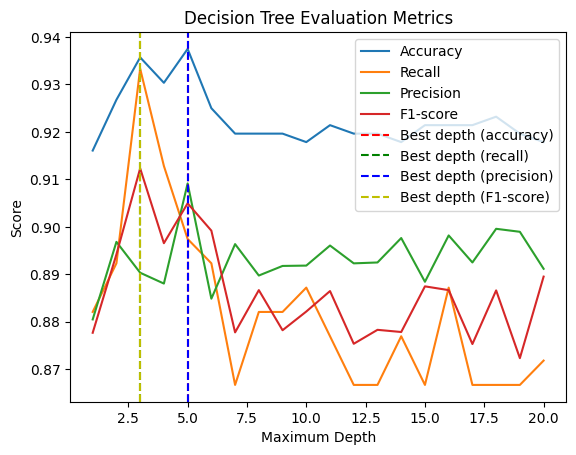

DecisionTreeClassifier(max_depth=3)

In [25]:
# Decision Tree Classification Algorithm

# Range of max_depth values
max_depth_values = list(range(1, 21))

# Initialize lists to store the cross-val scores
cv_scores_acc = []
cv_scores_recall = []
cv_scores_precision = []
cv_scores_f1 = []

# Perform K-Fold Cross Validation on range of max_depth on each evaluation metric with k=5
for max_depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    # Accuracy 
    scores_acc = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_acc.append(scores_acc.mean())

    # Recall 
    scores_recall = cross_val_score(dt, X_train, y_train, cv=5, scoring='recall')
    cv_scores_recall.append(scores_recall.mean())

    # Precision 
    scores_precision = cross_val_score(dt, X_train, y_train, cv=5, scoring='precision')
    cv_scores_precision.append(scores_precision.mean())

    # F1 
    scores_f1 = cross_val_score(dt, X_train, y_train, cv=5, scoring='f1')
    cv_scores_f1.append(scores_f1.mean())

# Calculate best max depth value based on each evaluation metric
best_depth_acc = max_depth_values[cv_scores_acc.index(max(cv_scores_acc))]
best_depth_recall = max_depth_values[cv_scores_recall.index(max(cv_scores_recall))]
best_depth_precision = max_depth_values[cv_scores_precision.index(max(cv_scores_precision))]
best_depth_f1 = max_depth_values[cv_scores_f1.index(max(cv_scores_f1))]

# Print the best max_depth values based on each evaluation metric
print("Best max depth value based on accuracy:", best_depth_acc)
print("Best max depth value based on recall:", best_depth_recall)
print("Best max depth value based on precision:", best_depth_precision)
print("Best max depth value based on F1-score:", best_depth_f1)

# Plot the cross-validation results for range of max_depth
plt.plot(max_depth_values, cv_scores_acc, label='Accuracy')
plt.plot(max_depth_values, cv_scores_recall, label='Recall')
plt.plot(max_depth_values, cv_scores_precision, label='Precision')
plt.plot(max_depth_values, cv_scores_f1, label='F1-score')

# Plot the best max depth values against each evaluation metric
plt.axvline(x=best_depth_acc, linestyle='--', color='r', label='Best depth (accuracy)')
plt.axvline(x=best_depth_recall, linestyle='--', color='g', label='Best depth (recall)')
plt.axvline(x=best_depth_precision, linestyle='--', color='b', label='Best depth (precision)')
plt.axvline(x=best_depth_f1, linestyle='--', color='y', label='Best depth (F1-score)')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.title('Decision Tree Evaluation Metrics')
plt.legend()

# Plot
plt.show()

# Train the model with the selected hyperparameter on the training data

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

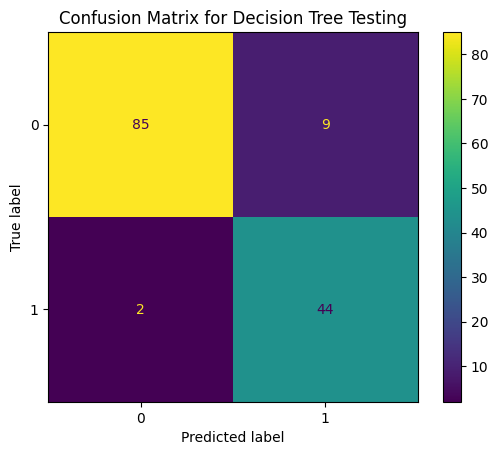

Precision based on max depth = 3:  0.8301886792452831
Recall based on max depth = 3:  0.9565217391304348
F1-Score based on max depth = 3: 0.888888888888889
Accuracy based on max depth = 3:  0.9214285714285714


In [26]:
# Decision Tree Testing

# Make predictions on the training set
y_pred_dt = dt.predict(X_test)


# Use the testing data to calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display  confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Decision Tree Testing')
plt.show()

# Evaluation metrics

# Calculate evaluation metrics using best max depth on testing data
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the evaluation metrics for max depth = 3
print("Precision based on max depth = 3: ", precision_dt)
print("Recall based on max depth = 3: ", recall_dt)
print("F1-Score based on max depth = 3:", f1_dt)
print("Accuracy based on max depth = 3: ", accuracy_dt)
